In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

DATA_NUMS = [1, 2, 3, 4, 6, 7, 8, 9, 10, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]

def load_sample_data(num=1):
    base_path = os.path.join("..", "data", "raw")
    run_path = os.path.join(base_path, f"run_data_{num}.parquet")
    run_df = pd.read_parquet(run_path)
    
    return run_df

def summarize_data(df, name):
    print(f"\n--- {name} ---")
    print(df.shape)
    print(df.dtypes)
    print(df.isnull().sum())
    print(df.head())


## Basic EDA

Number of unique sensors: 15
Top sensors:
 Sensor Name
Sensor_A    149043
Sensor_B    149043
Sensor_C    149043
Sensor_D    149043
Sensor_E    149043
Sensor_F    149043
Sensor_G    149043
Sensor_H    149043
Sensor_I    149043
Sensor_J    149043
Sensor_K    149043
Sensor_L    149043
Sensor_M    149043
Sensor_N    149043
Sensor_O    149043
Name: count, dtype: int64


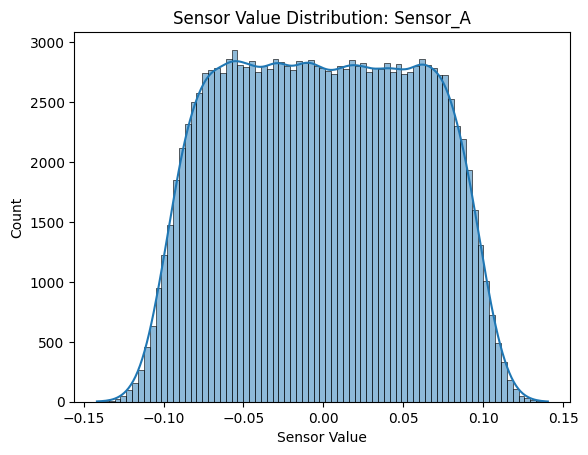

In [ ]:
run_df = load_sample_data(1)

print("Number of unique sensors:", run_df['Sensor Name'].nunique())
print("Top sensors:\n", run_df['Sensor Name'].value_counts().head(15))

# Sensor values distribution
sample_sensors = run_df['Sensor Name'].value_counts().head(5).index
for sensor in sample_sensors:
    sns.histplot(run_df[run_df['Sensor Name'] == sensor]['Sensor Value'], kde=True)
    plt.title(f"Sensor Value Distribution: {sensor}")
    plt.show()
    break

In [5]:
print("Shape:", run_df.shape)
print("\nColumn types:\n", run_df.dtypes)
print("\nMissing values:\n", run_df.isnull().sum())

print("\nUnique values per column:")
for col in run_df.columns:
    print(f"{col}: {run_df[col].nunique()}")

print("\nSample rows:")
print(run_df.sample(5))

Shape: (2235645, 10)

Column types:
 Tool ID                    object
Run Start Time     datetime64[ns]
Run End Time       datetime64[ns]
Run ID                     object
Process Step               object
Consumable Life           float32
Step ID                    object
Time Stamp         datetime64[ns]
Sensor Name                object
Sensor Value              float32
dtype: object

Missing values:
 Tool ID            0
Run Start Time     0
Run End Time       0
Run ID             0
Process Step       0
Consumable Life    0
Step ID            0
Time Stamp         0
Sensor Name        0
Sensor Value       0
dtype: int64

Unique values per column:
Tool ID: 1
Run Start Time: 225
Run End Time: 225
Run ID: 225
Process Step: 1
Consumable Life: 225
Step ID: 13
Time Stamp: 149043
Sensor Name: 15
Sensor Value: 2088865

Sample rows:
                                      Tool ID      Run Start Time  \
747431   8060e8e1-504a-5138-a9f0-e2770bd61ba1 2024-01-01 22:36:10   
1115316  8060e8e1-504a

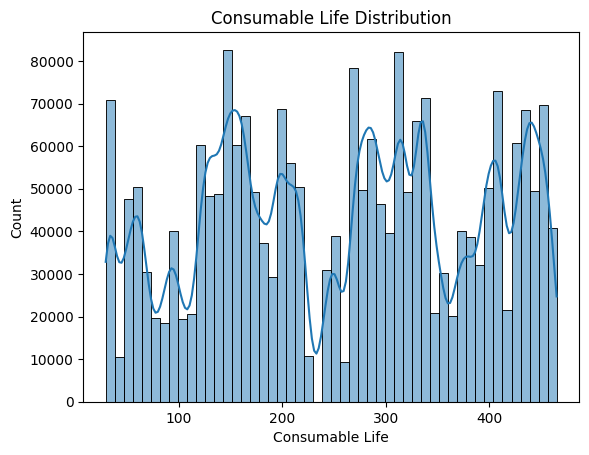

In [3]:
sns.histplot(run_df['Consumable Life'], bins=50, kde=True)
plt.title("Consumable Life Distribution")
plt.xlabel("Consumable Life")
plt.show()

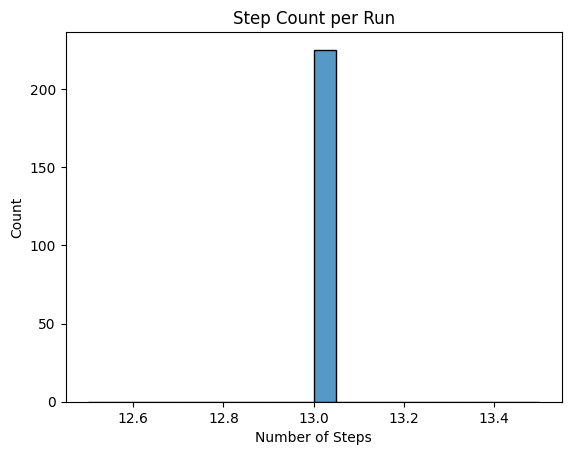

Top Step IDs: Step ID
Step_5     894075
Step_8     178785
Step_9     178785
Step_1     178785
Step_3     134205
Step_6     134205
Step_7     125025
Step_4      98250
Step_2      89460
Step_11     89460
Name: count, dtype: int64


In [4]:
# Steps per run
step_counts = run_df.groupby('Run ID')['Step ID'].nunique()
sns.histplot(step_counts, bins=20)
plt.title("Step Count per Run")
plt.xlabel("Number of Steps")
plt.show()

# Common Step IDs
print("Top Step IDs:", run_df['Step ID'].value_counts().head(10))


In [7]:
run_df.head(20)

,Tool ID,Run Start Time,Run End Time,Run ID,Process Step,Consumable Life,Step ID,Time Stamp,Sensor Name,Sensor Value
0,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:00.000000000,Sensor_A,-0.061105
1,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.000000002,Sensor_A,-0.040894
2,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.999999997,Sensor_A,0.005357
3,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:03.000000000,Sensor_A,-0.029941
4,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:04.000000002,Sensor_A,-0.098098
5,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:04.999999998,Sensor_A,0.021552
6,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:06.000000000,Sensor_A,0.065501
7,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:07.000000002,Sensor_A,0.038573
8,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:07.999999998,Sensor_A,0.064646
9,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:09.000000000,Sensor_A,-0.052911


In [ ]:
# export run_df.head(20) to a csv file in downloads folder
output_path = os.path.join(os.path.expanduser("~"), "Downloads", "run_data_sample.csv")
run_df.head(20).to_csv(output_path, index=False)
print(f"Exported sample data to {output_path}")


Exported sample data to C:\Users\ShNi424\Downloads\run_data_sample.csv


KeyboardInterrupt: 